In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from plotly import tools
import gc
import matplotlib.pyplot as plt
import seaborn as sns

#import os
#print(os.listdir("../input"))
from subprocess import check_output

from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

In [52]:
#load the dataset 
data = pd.read_csv('BTCUSD_hourly_data.csv')

In [53]:
data.head()

,date,open,high,low,close,volume
0,2011-09-13 13:00:00,5.80,6.00,5.80,6.00,25.000000
1,2011-09-13 14:00:00,5.95,5.95,5.76,5.76,22.353982
2,2011-09-13 15:00:00,5.65,5.65,5.65,5.65,2.542000
3,2011-09-13 16:00:00,NaN,NaN,NaN,NaN,0.000000
4,2011-09-13 17:00:00,NaN,NaN,NaN,NaN,0.000000


In [54]:
# Missing Value Treatment: the OHLC (open high low close) data is a continuous timeseries hence filled
# with fill forwards values.
data['open'].fillna(method='ffill', inplace=True)
data['high'].fillna(method='ffill', inplace=True)
data['low'].fillna(method='ffill', inplace=True)
data['close'].fillna(method='ffill', inplace=True)
# volume is a single event and hence NA's are replaced with zeroes
data['volume'].fillna(value=0, inplace=True)

,date,open,high,low,close,volume
0,2011-09-13 13:00:00,5.80,6.00,5.80,6.00,25.000000
1,2011-09-13 14:00:00,5.95,5.95,5.76,5.76,22.353982
2,2011-09-13 15:00:00,5.65,5.65,5.65,5.65,2.542000
3,2011-09-13 16:00:00,5.65,5.65,5.65,5.65,0.000000
4,2011-09-13 17:00:00,5.65,5.65,5.65,5.65,0.000000


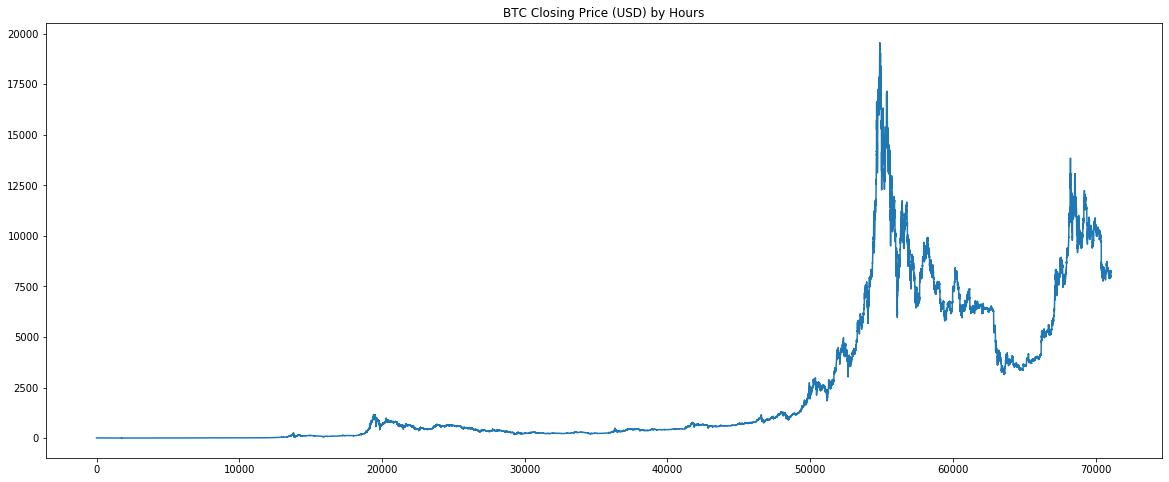

In [34]:
plt.figure(figsize=[20,8])
plt.title('BTC Closing Price (USD) by Hours')
plt.plot(data.close, '-', label='By Hours')

In [55]:
import datetime, pytz
#define a conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71086 entries, 0 to 71085
Data columns (total 6 columns):
date      71086 non-null datetime64[ns]
open      71086 non-null float64
high      71086 non-null float64
low       71086 non-null float64
close     71086 non-null float64
volume    71086 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 3.3 MB


In [57]:
data['date'] = pd.to_datetime(data['date'])

In [59]:
data['date'] = data['date'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='date', freq='H')]).first().reset_index()
data = data.set_index('date')

In [64]:
# split data
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [62]:
data = data[['close']]

In [66]:
# Data preprocess
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [67]:
data.head()

,close
date,
2011-09-13 13:00:00,6.00
2011-09-13 14:00:00,5.76
2011-09-13 15:00:00,5.65
2011-09-13 16:00:00,5.65
2011-09-13 17:00:00,5.65


In [68]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

Using TensorFlow backend.


In [69]:
model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/100
 - 10s - loss: 0.0203
Epoch 2/100
 - 8s - loss: 0.0051
Epoch 3/100
 - 9s - loss: 0.0028
Epoch 4/100
 - 7s - loss: 0.0019
Epoch 5/100
 - 9s - loss: 0.0014
Epoch 6/100
 - 8s - loss: 0.0010
Epoch 7/100
 - 7s - loss: 8.0849e-04
Epoch 8/100
 - 7s - loss: 6.7141e-04
Epoch 9/100
 - 9s - loss: 5.7232e-04
Epoch 10/100
 - 8s - loss: 5.0119e-04
Epoch 11/100
 - 9s - loss: 4.3249e-04
Epoch 12/100
 - 8s - loss: 3.8775e-04
Epoch 13/100
 - 9s - loss: 3.4874e-04
Epoch 14/100
 - 7s - loss: 3.2708e-04
Epoch 15/100
 - 9s - loss: 2.9879e-04
Epoch 16/100
 - 7s - loss: 2.8158e-04
Epoch 17/100
 - 10s - loss: 2.6893e-04
Epoch 18/100
 - 8s - loss: 2.5642e-04
Epoch 19/100
 - 10s - loss: 2.4565e-04
Epoch 20/100
 - 10s - loss: 2.4078e-04
Epoch 21/100
 - 9s - loss: 2.3337e-04
Epoch 22/100
 - 9s - loss: 2.3104e-04
Epoch 23/100
 - 10s - loss: 2.2432e-04
Epoch 24/100
 - 9s - loss: 2.1928e-04
Epoch 25/100
 - 10s - loss: 2.1603

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_close = model.predict(inputs)
predicted_close = sc.inverse_transform(predicted_close)

In [72]:
data_test['close_prediction'] = predicted_close
data_all = pd.concat([data_test, data_train], sort=False)

In [74]:
#saving the predicted values in a common data frame for future comparision
final_data = data_all
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'close_Prediction': 'lstm'})
final_data = final_data[['date','close','lstm']]

KeyError: "['lstm'] not in index"

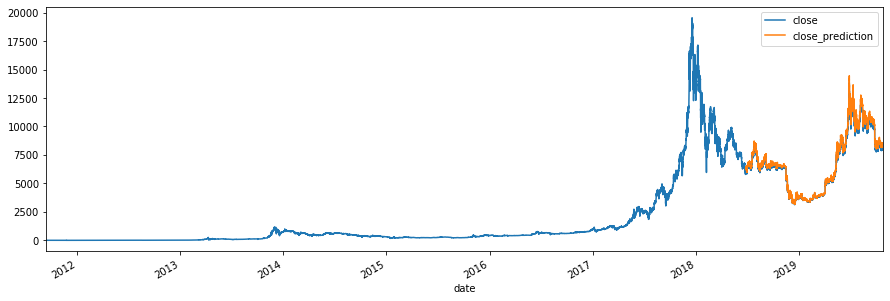

In [75]:
_ = data_all[['close','close_prediction']].plot(figsize=(15, 5))

In [77]:
#calculate MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=data_test['close'],
                   y_pred=data_test['close_prediction'])

60203.711708872266

In [81]:
# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[70.96004719]
